In [1]:
import pandas

# Analysis of all-the-news database

The following is a surface level analysis to check out what the dataset contains and check for any NaN values. 

We know from the [dataset description](https://www.kaggle.com/datasets/snapcrack/all-the-news) that the full dataset is not evenly sampled between publication sources and that most publications are from 2015, 2016 & 2017. 

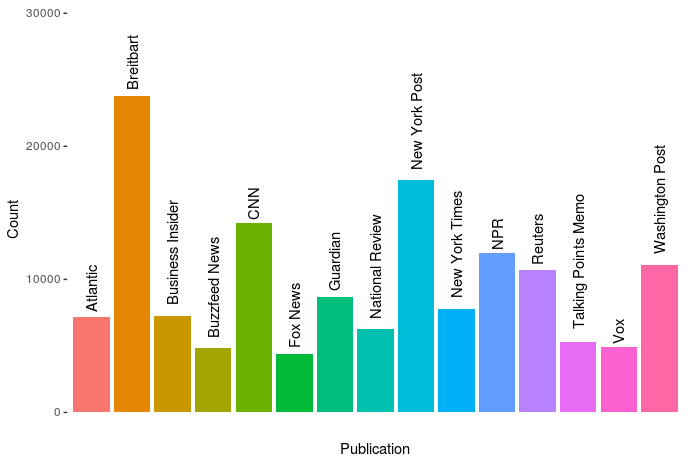

# articles1.csv

In [2]:
articles1 = pandas.read_csv("./archive/articles1.csv")
display(articles1)

Unnamed: 0     id                                              title  \
0               0  17283  House Republicans Fret About Winning Their Hea...   
1               1  17284  Rift Between Officers and Residents as Killing...   
2               2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3               3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4               4  17287  Kim Jong-un Says North Korea Is Preparing to T...   
...           ...    ...                                                ...   
49995       53287  73465   Rex Tillerson Says Climate Change Is Real, but …   
49996       53288  73466  The Biggest Intelligence Questions Raised by t...   
49997       53289  73467  Trump Announces Plan That Does Little to Resol...   
49998       53290  73468    Dozens of For-Profit Colleges Could Soon Close    
49999       53291  73469                       The Milky Way’s Stolen Stars   

          publication                         author        date    year  \
0      New York Times                     Carl Hulse  2016-12-31  2016.0   
1      New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0   
2      New York Times                   Margalit Fox  2017-01-06  2017.0   
3      New York Times               William McDonald  2017-04-10  2017.0   
4      New York Times                  Choe Sang-Hun  2017-01-02  2017.0   
...               ...                            ...         ...     ...   
49995        Atlantic                 Robinson Meyer  2017-01-11  2017.0   
49996        Atlantic                     Amy Zegart  2017-01-11  2017.0   
49997        Atlantic                  Jeremy Venook  2017-01-11  2017.0   
49998        Atlantic                    Emily DeRuy  2017-01-11  2017.0   
49999        Atlantic                   Marina Koren  2017-01-11  2017.0   

       month  url                                            content  
0       12.0  NaN  WASHINGTON  —   Congressional Republicans have...  
1        6.0  NaN  After the bullet shells get counted, the blood...  
2        1.0  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...  
3        4.0  NaN  Death may be the great equalizer, but it isn’t...  
4        1.0  NaN  SEOUL, South Korea  —   North Korea’s leader, ...  
...      ...  ...                                                ...  
49995    1.0  NaN  As chairman and CEO of ExxonMobil, Rex Tillers...  
49996    1.0  NaN  I’ve spent nearly 20 years looking at intellig...  
49997    1.0  NaN    Donald Trump will not be taking necessary st...  
49998    1.0  NaN  Dozens of   colleges could be forced to close ...  
49999    1.0  NaN  The force of gravity can be described using a ...  

[50000 rows x 10 columns]

We check out the distribution of Publication Source for this dataset

In [3]:
articles1["publication"].value_counts()

publication
Breitbart           23781
CNN                 11488
New York Times       7803
Business Insider     6757
Atlantic              171
Name: count, dtype: int64

We inspect what a row looks like

In [4]:
articles1.iloc[1]

Unnamed: 0                                                     1
id                                                         17284
title          Rift Between Officers and Residents as Killing...
publication                                       New York Times
author                             Benjamin Mueller and Al Baker
date                                                  2017-06-19
year                                                      2017.0
month                                                        6.0
url                                                          NaN
content        After the bullet shells get counted, the blood...
Name: 1, dtype: object

Every row is an article with common fields such as title, author, content, publication source and date.

It's of special notice the fact that the field URL can be NaN. 

In [5]:
articles1["url"].unique()

array([nan])

This dataset does not have a single row with a url.

Looking a bit deeper in the Kaggle Post the URL field sometimes links to the original online publication or other external posts

In [6]:
# Checking if there are repeated rows
articles1["id"].unique().size

50000

We concatenate the title and content in a single column

In [7]:
articles1['title_and_content'] = articles1['title'] + " " + articles1['content']

# articles2.csv

In [8]:
articles2 = pandas.read_csv("./archive/articles2.csv")
display(articles2)

Unnamed: 0      id                                              title  \
0           53293   73471  Patriots Day Is Best When It Digs Past the Her...   
1           53294   73472  A Break in the Search for the Origin of Comple...   
2           53295   73474         Obama’s Ingenious Mention of Atticus Finch   
3           53296   73475         Donald Trump Meets, and Assails, the Press   
4           53297   73476               Trump: ’I Think’ Hacking Was Russian   
...           ...     ...                                                ...   
49994      103453  151902  If Baltimore is serious about police reform, g...   
49995      103454  151903  The transition from summer to fall feels like ...   
49996      103455  151904  Colombia: Farc’s female fighters, then and now...   
49997      103456  151905                      Why I’m optimistic about 2017   
49998      103457  151906  Prayer and pain: why gay conversion therapy is...   

      publication             author        date    year  month  \
0        Atlantic         David Sims  2017-01-11  2017.0    1.0   
1        Atlantic            Ed Yong  2017-01-11  2017.0    1.0   
2        Atlantic  Spencer Kornhaber  2017-01-11  2017.0    1.0   
3        Atlantic    David A. Graham  2017-01-11  2017.0    1.0   
4        Atlantic      Kaveh Waddell  2017-01-11  2017.0    1.0   
...           ...                ...         ...     ...    ...   
49994    Guardian  Lawrence Grandpre  2016-08-12  2016.0    8.0   
49995    Guardian         Mary Valle  2016-08-28  2016.0    8.0   
49996    Guardian                NaN  2016-09-16  2016.0    9.0   
49997    Guardian         Paul Mason  2016-12-26  2016.0   12.0   
49998    Guardian           Tom Dart  2016-07-15  2016.0    7.0   

                                                     url  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
49994  https://www.theguardian.com/commentisfree/2016...   
49995  https://www.theguardian.com/commentisfree/2016...   
49996  https://www.theguardian.com/artanddesign/2016/...   
49997  https://www.theguardian.com/politics/commentis...   
49998  https://www.theguardian.com/world/2016/jul/15/...   

                                                 content  
0      Patriots Day, Peter Berg’s new thriller that r...  
1      In Norse mythology, humans and our world were ...  
2      “If our democracy is to work in this increasin...  
3      Updated on January 11 at 5:05 p. m. In his fir...  
4      Updated at 12:25 p. m. After months of equivoc...  
...                                                  ...  
49994  There have been many proposed solutions to the...  
49995  Maybe I feel like August won’t let go of me, b...  
49996  Diana Marcela, 28, has spent 13 years with Far...  
49997  This Christmas break, for anybody steeped in t...  
49998  Brian Nesbitt’s therapist made a suggestion in...  

[49999 rows x 10 columns]

In [9]:
# Checking the publication source distribution
articles2["publication"].value_counts()

publication
New York Post          17493
Atlantic                7008
National Review         6203
Talking Points Memo     5214
Guardian                4873
Buzzfeed News           4854
Fox News                4354
Name: count, dtype: int64

In [10]:
# Checking if there are repeated rows
articles2["id"].unique().size

49999

In [11]:
articles2["id"].hasnans

False

In [12]:
# Checking the amount of unique URL
articles2["url"].unique()

array([nan,
       'https://web.archive.org/web/20160101000951/http://www.foxnews.com/world/2015/12/31/fire-tears-through-dubai-building-near-planned-fireworks-show.html\n',
       'https://web.archive.org/web/20160101000951/http://www.foxnews.com/politics/2015/12/31/top-carson-campaign-staffers-resign.html\n',
       ...,
       'https://www.theguardian.com/artanddesign/2016/sep/16/colombia-farc-female-fighters-in-pictures',
       'https://www.theguardian.com/politics/commentisfree/2016/dec/26/why-im-optimistic-about-2017',
       'https://www.theguardian.com/world/2016/jul/15/gay-conversion-therapy-republican-party-platform'],
      dtype=object)

In [13]:
articles2["url"].value_counts()

url
https://web.archive.org/web/20160101000951/http://www.foxnews.com/world/2015/12/31/fire-tears-through-dubai-building-near-planned-fireworks-show.html\n    1
https://web.archive.org/web/20170613013557/http://nypost.com/2017/06/12/priebus-ive-got-one-foot-on-a-banana-peel-and-another-out-the-door/\n              1
https://web.archive.org/web/20170613013557/http://nypost.com/2017/06/12/attorneys-general-sue-trump-for-allegedly-violating-constitution/\n                1
https://web.archive.org/web/20170613013557/http://nypost.com/2017/06/12/15-year-old-boy-arrested-in-death-of-10-year-old-girl-police/\n                    1
https://web.archive.org/web/20170613013557/http://nypost.com/2017/06/12/prep-school-math-teacher-arrested-for-having-sex-with-students/\n                  1
                                                                                                                                                          ..
https://web.archive.org/web/20161222050819/https://www

We see that most of the posts reference the same article.

In [14]:
articles2['title_and_content'] = articles2['title'] + " " + articles2['content']

# articles3.csv

In [15]:
articles3 = pandas.read_csv("./archive/articles3.csv")
display(articles3)

Unnamed: 0      id                                              title  \
0          103459  151908  Alton Sterling’s son: ’Everyone needs to prote...   
1          103460  151909  Shakespeare’s first four folios sell at auctio...   
2          103461  151910  My grandmother’s death saved me from a life of...   
3          103462  151911  I feared my life lacked meaning. Cancer pushed...   
4          103463  151912  Texas man serving life sentence innocent of do...   
...           ...     ...                                                ...   
42566      146028  218078  An eavesdropping Uber driver saved his 16-year...   
42567      146029  218079  Plane carrying six people returning from a Cav...   
42568      146030  218080  After helping a fraction of homeowners expecte...   
42569      146031  218081  Yes, this is real: Michigan just banned bannin...   
42570      146032  218082  What happened in Washington state after voters...   

           publication                author        date    year  month  \
0             Guardian        Jessica Glenza  2016-07-13  2016.0    7.0   
1             Guardian                   NaN  2016-05-25  2016.0    5.0   
2             Guardian         Robert Pendry  2016-10-31  2016.0   10.0   
3             Guardian        Bradford Frost  2016-11-26  2016.0   11.0   
4             Guardian                   NaN  2016-08-20  2016.0    8.0   
...                ...                   ...         ...     ...    ...   
42566  Washington Post              Avi Selk  2016-12-30  2016.0   12.0   
42567  Washington Post         Sarah Larimer  2016-12-30  2016.0   12.0   
42568  Washington Post           Renae Merle  2016-12-30  2016.0   12.0   
42569  Washington Post        Chelsea Harvey  2016-12-30  2016.0   12.0   
42570  Washington Post  Christopher Ingraham  2016-12-29  2016.0   12.0   

                                                     url  \
0      https://www.theguardian.com/us-news/2016/jul/1...   
1      https://www.theguardian.com/culture/2016/may/2...   
2      https://www.theguardian.com/commentisfree/2016...   
3      https://www.theguardian.com/commentisfree/2016...   
4      https://www.theguardian.com/us-news/2016/aug/2...   
...                                                  ...   
42566  https://web.archive.org/web/20161231004909/htt...   
42567  https://web.archive.org/web/20161231004909/htt...   
42568  https://web.archive.org/web/20161231004909/htt...   
42569  https://web.archive.org/web/20161231004909/htt...   
42570  https://web.archive.org/web/20161231004909/htt...   

                                                 content  
0      The son of a Louisiana man whose father was sh...  
1      Copies of William Shakespeare’s first four boo...  
2      Debt: $20, 000, Source: College, credit cards,...  
3      It was late. I was drunk, nearing my 35th birt...  
4      A central Texas man serving a life sentence fo...  
...                                                  ...  
42566           Uber driver Keith Avila picked up a p...  
42567           Crews on Friday continued to search L...  
42568       When the Obama administration announced a...  
42569       This story has been updated. A new law in...  
42570       The nation’s first recreational marijuana...  

[42571 rows x 10 columns]

In [16]:
# Checking the publication source distribution
articles3["publication"].value_counts()

publication
NPR                11992
Washington Post    11114
Reuters            10710
Vox                 4947
Guardian            3808
Name: count, dtype: int64

In [17]:
# Checking if there are repeated rows
articles3["id"].unique().size

42571

In [18]:
articles3["url"].unique().size

42571

In this last dataset each row has a unique URL.

In [19]:
articles3['title_and_content'] = articles3['title'] + " " + articles3['content']

# Creating the joined dataset

The dataset we'll be using for the assignment is the joinned dataset of articles1.csv, articles2.csv and articles3.csv.

From the publication id column we can tell that there are not any repeated rows in any datasets, as they are all different publications.

Since every dataset has the same column names, we can directly concatenate the datasets and get a single dataset which we'll use for the project

In [20]:
concat_dataset = pandas.concat([articles1, articles2,articles3], ignore_index=True)
display(concat_dataset)

Unnamed: 0      id                                              title  \
0                0   17283  House Republicans Fret About Winning Their Hea...   
1                1   17284  Rift Between Officers and Residents as Killing...   
2                2   17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3                3   17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4                4   17287  Kim Jong-un Says North Korea Is Preparing to T...   
...            ...     ...                                                ...   
142565      146028  218078  An eavesdropping Uber driver saved his 16-year...   
142566      146029  218079  Plane carrying six people returning from a Cav...   
142567      146030  218080  After helping a fraction of homeowners expecte...   
142568      146031  218081  Yes, this is real: Michigan just banned bannin...   
142569      146032  218082  What happened in Washington state after voters...   

            publication                         author        date    year  \
0        New York Times                     Carl Hulse  2016-12-31  2016.0   
1        New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0   
2        New York Times                   Margalit Fox  2017-01-06  2017.0   
3        New York Times               William McDonald  2017-04-10  2017.0   
4        New York Times                  Choe Sang-Hun  2017-01-02  2017.0   
...                 ...                            ...         ...     ...   
142565  Washington Post                       Avi Selk  2016-12-30  2016.0   
142566  Washington Post                  Sarah Larimer  2016-12-30  2016.0   
142567  Washington Post                    Renae Merle  2016-12-30  2016.0   
142568  Washington Post                 Chelsea Harvey  2016-12-30  2016.0   
142569  Washington Post           Christopher Ingraham  2016-12-29  2016.0   

        month                                                url  \
0        12.0                                                NaN   
1         6.0                                                NaN   
2         1.0                                                NaN   
3         4.0                                                NaN   
4         1.0                                                NaN   
...       ...                                                ...   
142565   12.0  https://web.archive.org/web/20161231004909/htt...   
142566   12.0  https://web.archive.org/web/20161231004909/htt...   
142567   12.0  https://web.archive.org/web/20161231004909/htt...   
142568   12.0  https://web.archive.org/web/20161231004909/htt...   
142569   12.0  https://web.archive.org/web/20161231004909/htt...   

                                                  content  \
0       WASHINGTON  —   Congressional Republicans have...   
1       After the bullet shells get counted, the blood...   
2       When Walt Disney’s “Bambi” opened in 1942, cri...   
3       Death may be the great equalizer, but it isn’t...   
4       SEOUL, South Korea  —   North Korea’s leader, ...   
...                                                   ...   
142565           Uber driver Keith Avila picked up a p...   
142566           Crews on Friday continued to search L...   
142567       When the Obama administration announced a...   
142568       This story has been updated. A new law in...   
142569       The nation’s first recreational marijuana...   

                                        title_and_content  
0       House Republicans Fret About Winning Their Hea...  
1       Rift Between Officers and Residents as Killing...  
2       Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  
3       Among Deaths in 2016, a Heavy Toll in Pop Musi...  
4       Kim Jong-un Says North Korea Is Preparing to T...  
...                                                   ...  
142565  An eavesdropping Uber driver saved his 16-year...  
142566  Plane carrying six people returning from a Cav...  
142567  

In [21]:
# Checking we don't have repeated documents
concat_dataset["id"].unique().size

142570

In [22]:
# Checking the initial plot (publication source distribution)
concat_dataset["publication"].value_counts()

publication
Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: count, dtype: int64

We make sure the title_and_content column doesn't contain any Nans and if fix any 

In [23]:
concat_dataset[concat_dataset["title_and_content"].isna()]

Unnamed: 0      id title          publication         author  \
64875        68283   96065   NaN  Talking Points Memo            NaN   
120637      124100  185332   NaN              Reuters  Daniel Wallis   

              date    year  month  \
64875   2016-02-12  2016.0    2.0   
120637  2016-01-15  2016.0    1.0   

                                                      url  \
64875   https://web.archive.org/web/20160213080712/htt...   
120637  http://www.reuters.com/article/us-oregon-milit...   

                                                  content title_and_content  
64875   Harry Reid tries to drop kick Alan Grayson rig...               NaN  
120637  The occupiers, who took over buildings at the ...               NaN

In [24]:
concat_dataset.loc[64875,"title_and_content"] = concat_dataset.loc[64875,"content"]
concat_dataset.loc[120637,"title_and_content"] = concat_dataset.loc[120637,"content"]

To process the TF-IDF we only need the title and content of each document, so I keep only the id and title_and_content columns for the final dataset

In [25]:
final_dataset = concat_dataset[["id", "title_and_content"]]
display(final_dataset)

id                                  title_and_content
0        17283  House Republicans Fret About Winning Their Hea...
1        17284  Rift Between Officers and Residents as Killing...
2        17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...
3        17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...
4        17287  Kim Jong-un Says North Korea Is Preparing to T...
...        ...                                                ...
142565  218078  An eavesdropping Uber driver saved his 16-year...
142566  218079  Plane carrying six people returning from a Cav...
142567  218080  After helping a fraction of homeowners expecte...
142568  218081  Yes, this is real: Michigan just banned bannin...
142569  218082  What happened in Washington state after voters...

[142570 rows x 2 columns]

In [26]:
# We lowercase every word
final_dataset.loc[:,"title_and_content"] = final_dataset['title_and_content'].str.lower()

In [27]:
final_dataset

id                                  title_and_content
0        17283  house republicans fret about winning their hea...
1        17284  rift between officers and residents as killing...
2        17285  tyrus wong, ‘bambi’ artist thwarted by racial ...
3        17286  among deaths in 2016, a heavy toll in pop musi...
4        17287  kim jong-un says north korea is preparing to t...
...        ...                                                ...
142565  218078  an eavesdropping uber driver saved his 16-year...
142566  218079  plane carrying six people returning from a cav...
142567  218080  after helping a fraction of homeowners expecte...
142568  218081  yes, this is real: michigan just banned bannin...
142569  218082  what happened in washington state after voters...

[142570 rows x 2 columns]

In [28]:
final_dataset["title_and_content"].hasnans

False

In [29]:
# We save the final dataset
final_dataset.to_csv('all_the_news.csv')

# Training TF-IDF 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# Make sure we don't have nans
final_dataset["title_and_content"].hasnans

False

# Getting Doc from URL

We scrape the URL to obtain the webpage's content

In [32]:
import requests
from urllib.parse import unquote
from bs4 import BeautifulSoup

In [33]:
url = "https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FTf-idf"
response = requests.get(unquote(url))

In [34]:
soup = BeautifulSoup(response.content, "html.parser")

In [35]:
title = soup.find('h1')

if title:
    title = title.get_text()
else:
    title = ""

In [36]:
paragraphs = soup.find_all('p')
all_text = ' '.join([p.get_text() for p in paragraphs])
all_text = title + ' ' + all_text

In [37]:
scraped_text = all_text.replace('\n', '').replace('\t', '').lower()

In [38]:
scraped_text.lower()

'tf–idf in information retrieval, tf–idf (also tf*idf, tfidf, tf–idf, or tf–idf), short for term frequency–inverse document frequency,  is a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general.[1] it was often used as a weighting factor in searches of information retrieval, text mining, and user modeling. a survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries used tf–idf.[2] variations of the tf–idf weighting scheme were often used by search engines as a central tool in scoring and ranking a document\'s relevance given a user query. one of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model. karen spärck jones (1972) conceived a statistical interpretation of term-specificity called inverse document frequency (idf), which became a cornerstone of

## Term Frequency

In [39]:
documents = final_dataset["title_and_content"].to_list()

In [40]:
# Adding the scrapped document to the dataset
documents.append(scraped_text)

display(documents)

['house republicans fret about winning their health care suit - the new york times washington  —   congressional republicans have a new fear when it comes to their    health care lawsuit against the obama administration: they might win. the incoming trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   americans, handing house republicans a big victory on    issues. but a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before republicans have prepared a replacement. that could lead to chaos in the insurance market and spur a political backlash just as republicans gain full control of the government. to stave off that outcome, republicans could find themselves in the awkward position of appropriating huge sums to temporar

In [41]:
"""
# This is too complex
import nltk

nltk.download('punkt')

from nltk.tokenize import word_tokenize

#custom function

def tok(text):
    tokens = word_tokenize(text)
    return tokens
"""

"\n# This is too complex\nimport nltk\n\nnltk.download('punkt')\n\nfrom nltk.tokenize import word_tokenize\n\n#custom function\n\ndef tok(text):\n    tokens = word_tokenize(text)\n    return tokens\n"

In [42]:
"""
# This is too complex
import re

def custom_tokenizer(text):
    
    text = text.lower() 
    
    # remove special chars
    text = re.sub("\\W"," ",text)
    
    return text
    """

'\n# This is too complex\nimport re\n\ndef custom_tokenizer(text):\n    \n    text = text.lower() \n    \n    # remove special chars\n    text = re.sub("\\W"," ",text)\n    \n    return text\n    '

## TF-IDF

Calculate TF-IDF table for the corpus plus the new document

In [43]:
# The parameters do the data-preprocessing. This step can be improved with custom tokenization
tfidf = TfidfVectorizer(stop_words="english", lowercase=True, strip_accents='unicode')

# get tf-df values
result = tfidf.fit_transform(documents)

In [44]:
result.shape

(142571, 308927)

We have 142570 documents and 311572 terms

In [45]:
tfidf_url_page = result[-1].toarray()[0]

In [46]:
ordered_tfidf_url_page = sorted(zip(tfidf.get_feature_names_out(), tfidf_url_page), key=lambda x: x[1], reverse=True )

In [47]:
# print the top 10 terms for the doc

limit = 10
ordered_tfidf_url_page[:limit]

[('tf', 0.602494908892966),
 ('idf', 0.568578753680022),
 ('document', 0.2573803816009488),
 ('frequency', 0.22753989123781593),
 ('term', 0.18963793374246268),
 ('displaystyle', 0.1330493254579361),
 ('documents', 0.12858043546620354),
 ('inverse', 0.11954630957343),
 ('corpus', 0.09943334378559132),
 ('logarithm', 0.08069537976178284)]

In [48]:
# Printing the top limit=10 terms
for ele1, ele2 in ordered_tfidf_url_page[:limit]:
    print(ele1, ':', ele2)

tf : 0.602494908892966
idf : 0.568578753680022
document : 0.2573803816009488
frequency : 0.22753989123781593
term : 0.18963793374246268
displaystyle : 0.1330493254579361
documents : 0.12858043546620354
inverse : 0.11954630957343
corpus : 0.09943334378559132
logarithm : 0.08069537976178284


In [49]:
# Returning as a list of dictionary items
[
    {
        "term": term,
        "tf-idf": tfidf
    }
    for term, tfidf in ordered_tfidf_url_page[:limit]
]

[{'term': 'tf', 'tf-idf': 0.602494908892966},
 {'term': 'idf', 'tf-idf': 0.568578753680022},
 {'term': 'document', 'tf-idf': 0.2573803816009488},
 {'term': 'frequency', 'tf-idf': 0.22753989123781593},
 {'term': 'term', 'tf-idf': 0.18963793374246268},
 {'term': 'displaystyle', 'tf-idf': 0.1330493254579361},
 {'term': 'documents', 'tf-idf': 0.12858043546620354},
 {'term': 'inverse', 'tf-idf': 0.11954630957343},
 {'term': 'corpus', 'tf-idf': 0.09943334378559132},
 {'term': 'logarithm', 'tf-idf': 0.08069537976178284}]